# Introduction

Hello everyone, this is my take on the **Heart Attack Analysis and Prediction** dataset in which I've made some interesting and insighful visualizations and I've also tried a few machine learning models to predict whether a person is likely to have a heart attack or not.

### Note

If you find it helpful and intuitive, then feel free to upvote the notebook. If there's anything I can improve on then do comment down below, your opinions and suggestions are valuable to me! Thank you! :)

### Feature Description

The following are the description of each feature:

    1. age - age in years
    
    2. sex - sex ( 0 = female; 1 = male)
    
    3. cp - chest pain type (0 = asymptomatic; 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain;)
    
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    
    5. chol - serum cholestoral in mg/dl
    
    6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    
    7. restecg - resting electrocardiographic results (0 = hypertrophy ;1 = normal; 2 = having ST-T wave abnormality)
    
    8. thalach - maximum heart rate achieved
    
    9. exang - exercise induced angina (1 = yes; 0 = no)
    
    10. oldpeak - ST depression induced by exercise relative to rest
    
    11. slope - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
    
    12. ca - number of major vessels (0-3) colored by fluoroscopy
    
    13. thal - 1 = fixed defect; 2 = normal; 3 = reversible defect
    
    14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)


***

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# For feature selection
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# For model selection, modelling and testing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

***

# Loading the dataset

In [2]:
index=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [3]:
df=pd.read_csv('data/heart.csv',names=index,header=0)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***

# Colors

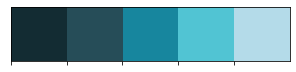

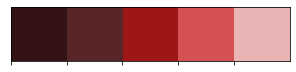

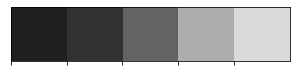

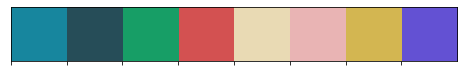

In [6]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
sns.palplot(colors_blue)
sns.palplot(colors_red)
sns.palplot(colors_dark)
sns.palplot(colors_mix)

***

# EDA

I tried to explore the data with the help of visualizations to find some interesting insights about it which could be useful for the model.

In [7]:
def grouping(age):
    if age>=18 and age<=30:
        return 0
    elif age>=31 and age<=40:
        return 1
    elif age>=41 and age<=50:
        return 2
    elif age>=51 and age<=60:
        return 3
    else:
        return 4

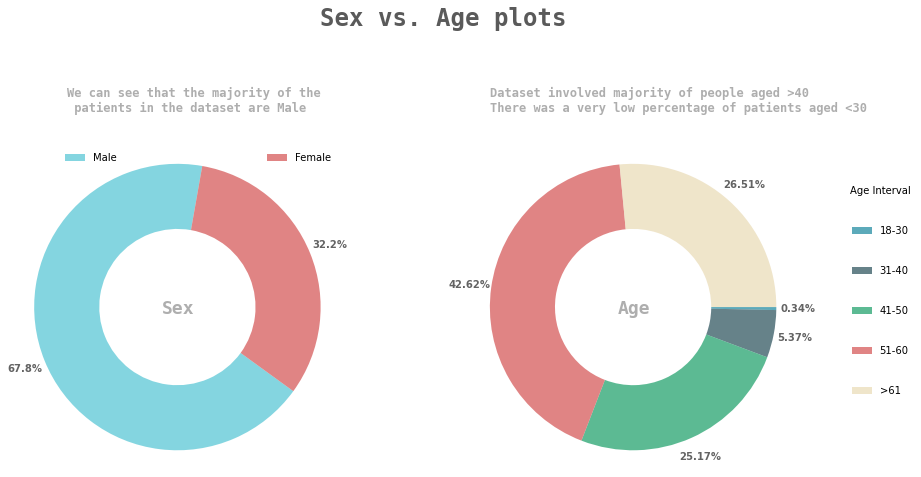

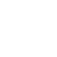

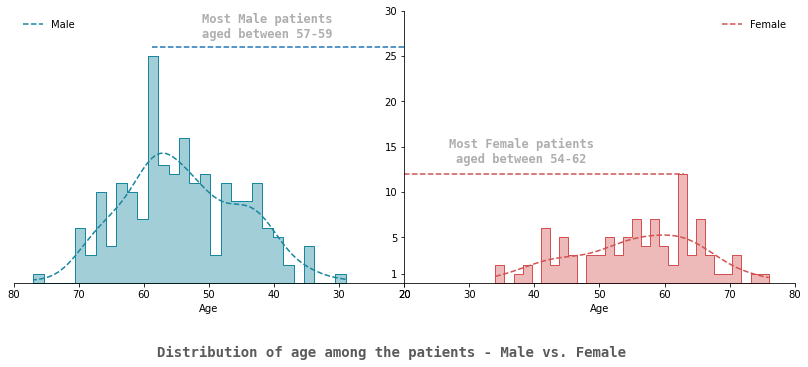

In [43]:
age_int = df['age'].apply(grouping).value_counts(sort=False)

labels=['18-30','31-40','41-50','51-60','>61']

# Pie Charts

fig,ax = plt.subplots(1,2,figsize=(14,14))
plt.suptitle('Sex vs. Age plots',size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=0.80,x=0.55,alpha=0.8)

# Pie Chart - Left

ax[0].pie(df['sex'].value_counts(),autopct='{:.1f}%'.format,
          colors=[colors_blue[3],colors_red[3]],wedgeprops={'width':0.5,'alpha':0.7},
          pctdistance=1.15,startangle=80,radius=1.1,textprops={'fontsize': 10, 'color': colors_dark[2],
                                                               'fontweight': 'bold'})

ax[0].legend(['Male','Female'],frameon=False,ncol=2,columnspacing=15,loc='upper right')

ax[0].text(s='We can see that the majority of the\n patients in the dataset are Male',
               fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace',
                         },x=-0.85,y=1.5)

ax[0].text(s='Sex',fontdict={'color':colors_dark[3],'size':18,'fontweight':'semibold','fontname':'monospace'}
           ,x=-0.12,y=-0.05)

#Pie Chart - Right

ax[1].pie(age_int,autopct='{:.2f}%'.format,colors=colors_mix,wedgeprops={'width':0.5,'alpha':0.7},
          pctdistance=1.15,radius=1.1,textprops={'fontsize': 10, 'color': colors_dark[2],'fontweight': 'bold'},
         counterclock=False)

ax[1].legend(labels,frameon=False,bbox_to_anchor=(1.38,0.9),labelspacing=3,title='Age Interval')

ax[1].text(s='Dataset involved majority of people aged >40\nThere was a very low percentage of patients aged <30',
               fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace',
                         },x=-1.1,y=1.5)

ax[1].text(s='Age',fontdict={'color':colors_dark[3],'size':18,'fontweight':'semibold','fontname':'monospace'}
           ,x=-0.12,y=-0.05)


fig.subplots_adjust(wspace=0.4)

# Easy way to add whitespace between the plots :p

fig,ax=plt.subplots(figsize=(0.6,0.6))
ax.set_visible(False)

# Histograms with KDE

fig,ax = plt.subplots(1,2,figsize=(14,5),sharey=False)

# Left Hist

sns.histplot(df[df['sex']==1]['age'],ax=ax[0],bins=30,alpha=0.4,color=colors_blue[2],
             element='step',kde=True,line_kws={'ls':'--'})
ax[0].set_xlim(20,80)
ax[0].set_ylim(0,30)
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].yaxis.tick_right()
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Age')
ax[0].legend(['Male'],loc='upper left',frameon=False)
ax[0].axhline(y=26,xmin=1,xmax=1-(39/60),ls='--')

ax[0].set_title('Most Male patients\naged between 57-59',y=0.88,x=0.65,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})

# Right Hist

sns.histplot(df[df['sex']==0]['age'],ax=ax[1],bins=30,alpha=0.4,color=colors_red[3],
             element='step',kde=True,line_kws={'ls':'--'})
ax[1].set_xlim(20,80)
ax[1].set_ylim(0,30)
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([1,5,10,15,20,25,30])
ax[1].set_xlabel('Age')
ax[1].legend(['Female'],loc='upper right',frameon=False)
ax[1].axhline(y=12,xmin=0,xmax=43/60,ls='--',color=colors_red[3])

ax[1].set_title('Most Female patients\naged between 54-62',y=0.42,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})

fig.suptitle('Distribution of age among the patients - Male vs. Female',size=14,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=-0.05,x=0.5,alpha=0.8)

fig.subplots_adjust(wspace=0)

## Some Data Cleaning

Before doing any further analysis on the data, we should first correct the incorrect data within some columns:

The values of **thal** lies between 1-3 but in the dataset, there's also a value 0 in 2 rows.

So we'll replace them with the most frequent value in the thal column

In [9]:
df['thal']=df['thal'].apply(lambda x: int(df['thal'].mode()) if (x==0) else int(x))

In [10]:
df['thal'].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

Also, the values in the **ca** feature should range between 0-3 but it also contains other value, 4 which indicated null values.

Instead of imputing the values, I'll be removing these rows from the dataset

In [11]:
df.drop(df[df['ca']==4].index,inplace=True)

In [12]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
Name: ca, dtype: int64

In [13]:
df.reset_index(drop=True,inplace=True)

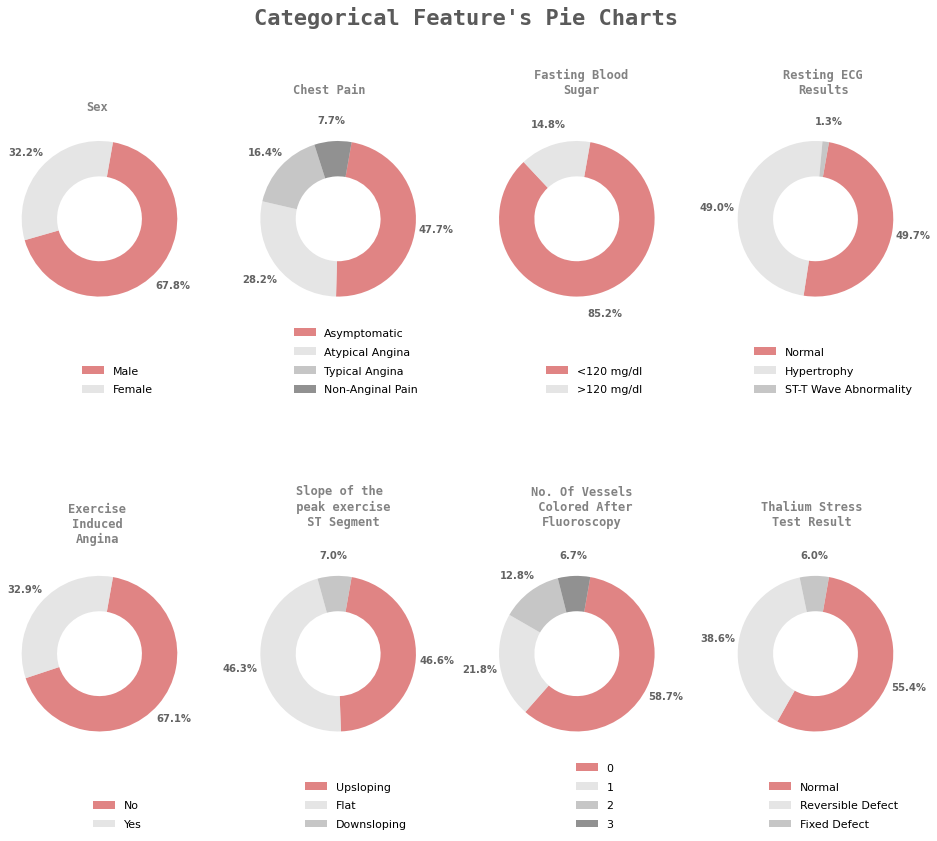

In [14]:
l = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
c = [colors_red[3],colors_dark[4],colors_dark[3],colors_dark[2]]
lab = [['Male','Female'],
       ['Asymptomatic','Atypical Angina','Typical Angina','Non-Anginal Pain'],
       ['<120 mg/dl','>120 mg/dl'],
       ['Normal','Hypertrophy','ST-T Wave Abnormality'],
       ['No','Yes'],
       ['Upsloping','Flat','Downsloping'],
       ['0','1','2','3'],
       ['Normal','Reversible Defect','Fixed Defect']
      ]
title = ['Sex','Chest Pain','Fasting Sugar Level','Resting Electrocardiographic Results','Exercise Induced Angina',
        'Slope','No. Of Vessels Colored By Fluoroscopy','Thalium Stress Test Result']

fig,ax = plt.subplots(2,4,figsize=(16,12))
for i in range(0,8):
        ax[i//4,i%4].pie(df[l[i]].value_counts(),autopct='{:.1f}%'.format,counterclock=False,
          colors=c,wedgeprops={'width':0.5,'alpha':0.7},pctdistance=1.27,startangle=80,radius=1.1,
                         textprops={'fontsize': 10, 'color': colors_dark[2],'fontweight': 'bold'})
        ax[i//4,i%4].legend(lab[i],loc='lower center',bbox_to_anchor=(0.6,-0.55),frameon=False,
                            labelspacing=0.8,fontsize=11)
        
fig.text(s='Sex',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.88,x=0.19,alpha=0.8)        
fig.text(s='Chest Pain',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.90,x=0.37,alpha=0.8)        
fig.text(s='Fasting Blood\nSugar',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.90,x=0.62,alpha=0.8,ha='center')
fig.text(s='Resting ECG\nResults',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.90,x=0.83,alpha=0.8,ha='center')

fig.text(s='Exercise\nInduced\nAngina',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.38,x=0.2,alpha=0.8,ha='center')
fig.text(s='Slope of the\n peak exercise\n ST Segment',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.4,x=0.41,alpha=0.8,ha='center')
fig.text(s='No. Of Vessels\n Colored After\nFluoroscopy',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.4,x=0.62,alpha=0.8,ha='center')
fig.text(s='Thalium Stress\nTest Result',size=12,fontweight='bold',fontname='monospace',
         color=colors_dark[2],y=0.4,x=0.82,alpha=0.8,ha='center')

fig.suptitle('Categorical Feature\'s Pie Charts',size=22,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.52,alpha=0.8)
fig.subplots_adjust(wspace=0.35,hspace=1)

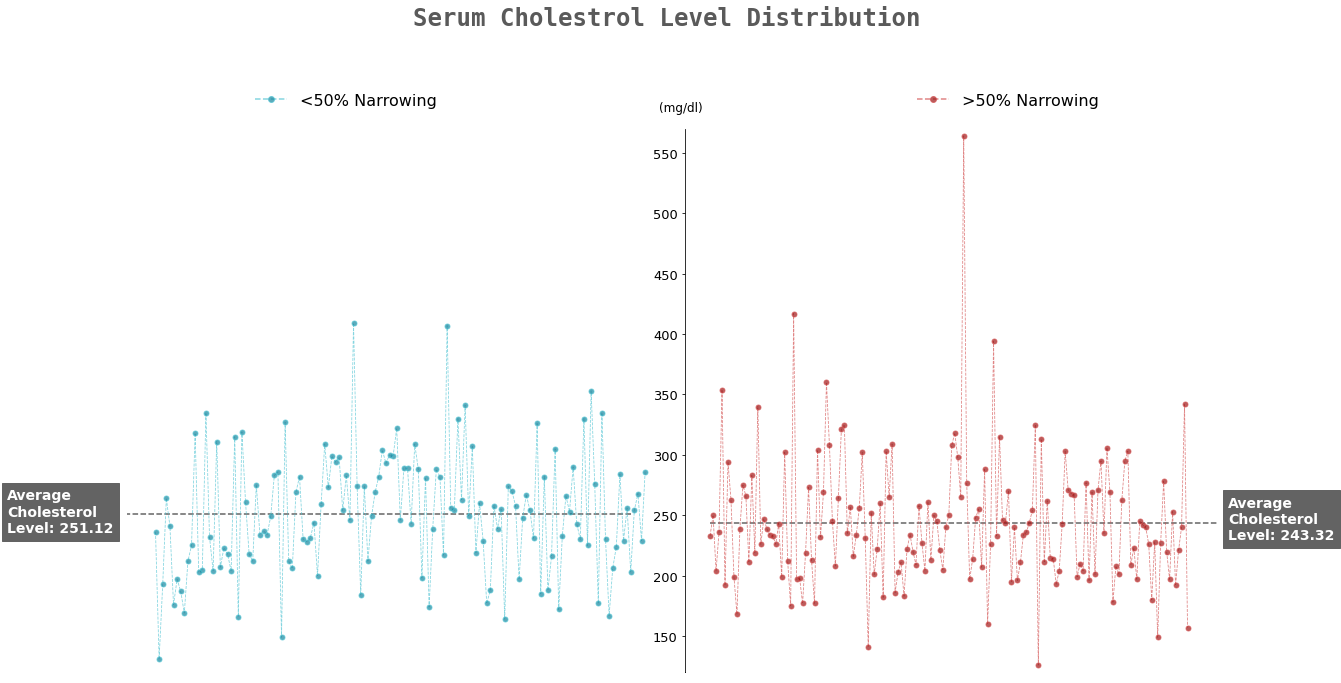

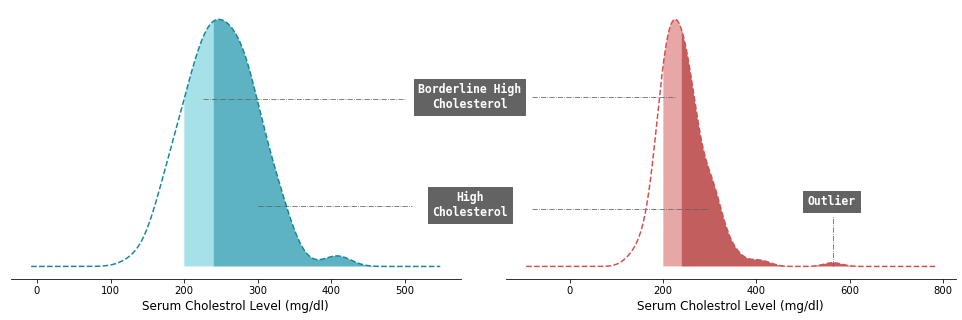

In [15]:
mean_0 = df[df['target']==0]['chol'].mean()
mean_1 = df[df['target']==1]['chol'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

# Left Line Plot

ax[0].plot(df[df['target']==0]['chol'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=165,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(120,570)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average\nCholesterol\nLevel: {:.2f}'.format(mean_0),x=0.042,y=0.32,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['target']==1]['chol'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=0,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(120,570)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
ax[1].set_title('',y=0.42,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'bold','fontname':'monospace'})
fig.text(s='Average\nCholesterol\nLevel: {:.2f}'.format(mean_1),x=0.89,y=0.31,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')

fig.text(s='(mg/dl)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['target']==0]['chol'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Serum Cholestrol Level (mg/dl)',fontsize=12)
line = ax[0].get_lines()[-1]
x, y = line.get_data()
mask1 = x > 200
mask2 = x>=240
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax[0].fill_between(x1, y1, alpha=0.5, facecolor=colors_blue[3])
ax[0].fill_between(x2, y2, alpha=0.5, facecolor=colors_blue[2])
ax[0].hlines(0.0018,xmin=300,xmax=510,ls='-.',color=colors_dark[2],lw=0.8)
ax[0].hlines(0.005,xmin=225,xmax=500,ls='-.',color=colors_dark[2],lw=0.8)

# Right KDE Plot

df[df['target']==1]['chol'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='',
          x=0.55,y=0.65,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Serum Cholestrol Level (mg/dl)',fontsize=12)
line = ax[1].get_lines()[-1]
x,y = line.get_data()
mask1 = x > 200
mask2 = x>=240
x1, y1 = x[mask1], y[mask1]
x2,y2 = x[mask2],y[mask2]
ax[1].fill_between(x1, y1, alpha=0.5, facecolor=colors_red[3])
ax[1].fill_between(x2, y2, alpha=0.5, facecolor=colors_red[2])
ax[1].hlines(0.0020,xmin=-80,xmax=300,ls='-.',color=colors_dark[2],lw=0.8)
ax[1].hlines(0.0059,xmin=-80,xmax=225,ls='-.',color=colors_dark[2],lw=0.8)
ax[1].vlines(x=564,ymin=0,ymax=0.0018,ls='-.',color=colors_dark[2],lw=0.8)

fig2.text(s='High\nCholesterol',x=0.55,y=0.30,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
fig2.text(s='Borderline High\nCholesterol',x=0.55,y=0.60,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
fig2.text(s='Outlier',x=0.885,y=0.33,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold',
                   'fontname':'monospace','ha':'center'},backgroundcolor=colors_dark[2])

fig.suptitle('Serum Cholestrol Level Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1.05,x=0.5,alpha=0.8)
fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)



fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)

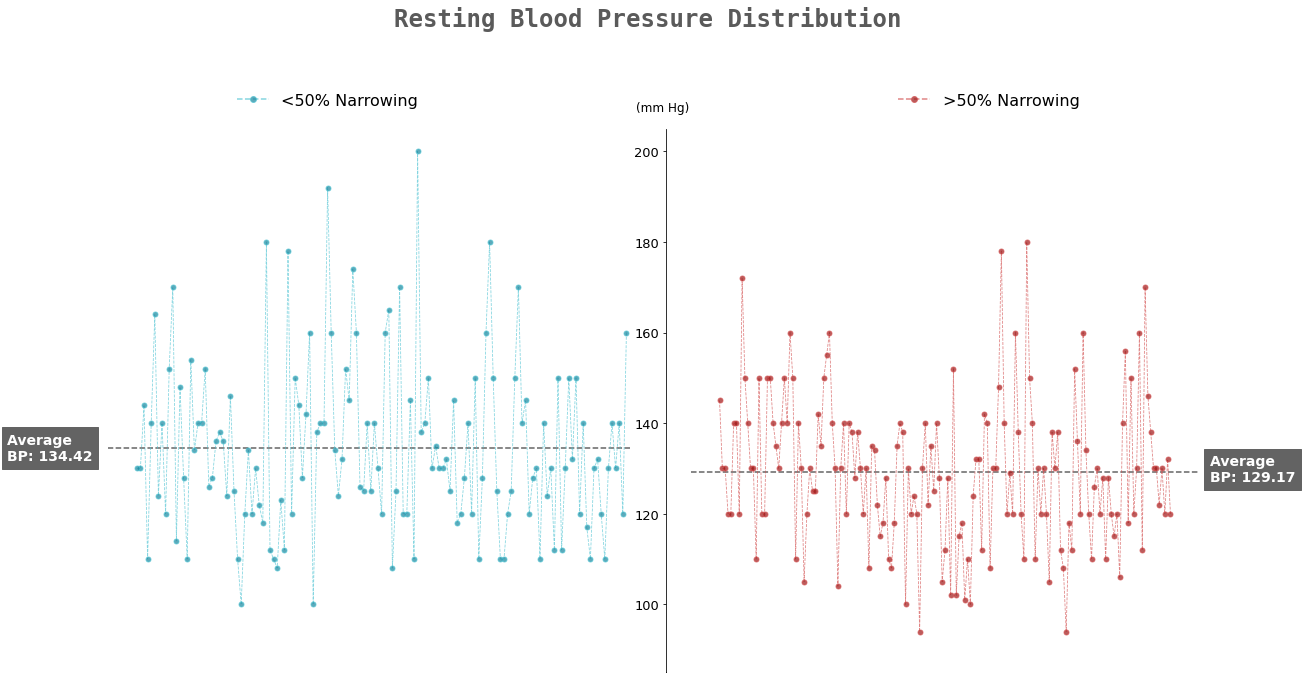

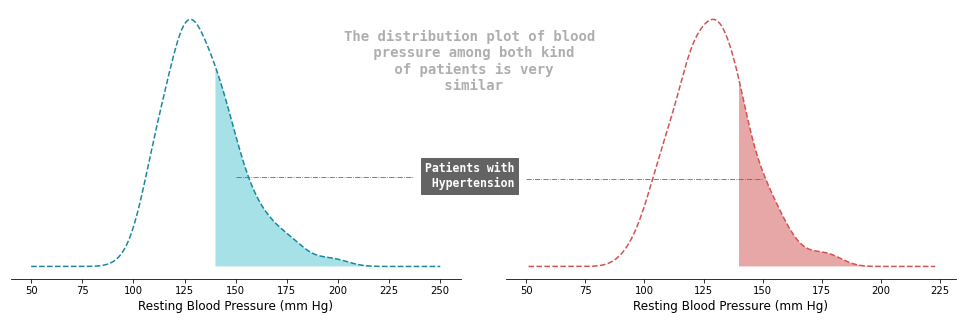

In [16]:
mean_0 = df[df['target']==0]['trestbps'].mean()
mean_1 = df[df['target']==1]['trestbps'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

# Left Line Plot

ax[0].plot(df[df['target']==0]['trestbps'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=160,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(85,205)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average \nBP: {:.2f}'.format(mean_0),x=0.055,y=0.42,color='white',backgroundcolor=colors_dark[2],
        fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['target']==1]['trestbps'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=-10,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(85,205)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
fig.text(s='Average \nBP: {:.2f}'.format(mean_1),x=0.89,y=0.39,color='white',backgroundcolor=colors_dark[2],
        fontsize=14,weight='bold')
fig.text(s='(mm Hg)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['target']==0]['trestbps'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Resting Blood Pressure (mm Hg)',fontsize=12)
line = ax[0].get_lines()[-1]
x, y = line.get_data()
mask = x > 140
x, y = x[mask], y[mask]
ax[0].fill_between(x, y1=y, alpha=0.5, facecolor=colors_blue[3])
ax[0].hlines(0.0080,xmin=150,xmax=237,ls='-.',color=colors_dark[2],lw=0.8)


# Right KDE Plot

df[df['target']==1]['trestbps'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='The distribution plot of blood\n pressure among both kind\n of patients is very\n similar',
          x=0.55,y=0.65,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Resting Blood Pressure (mm Hg)',fontsize=12)
line = ax[1].get_lines()[-1]
x,y = line.get_data()
mask = x>140
x,y = x[mask],y[mask]
ax[1].fill_between(x,y,alpha=0.5,facecolor = colors_red[3])
fig2.text(s='Patients with\n Hypertension',x=0.55,y=0.38,
         fontdict={'color':'white','size':11.5,'fontweight':'semibold','fontname':'monospace','ha':'center'},
         backgroundcolor=colors_dark[2])
ax[1].hlines(0.0085,xmin=50,xmax=150,ls='-.',color=colors_dark[2],lw=0.8)


fig.suptitle('Resting Blood Pressure Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1.05,x=0.5,alpha=0.8)
fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)



fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)

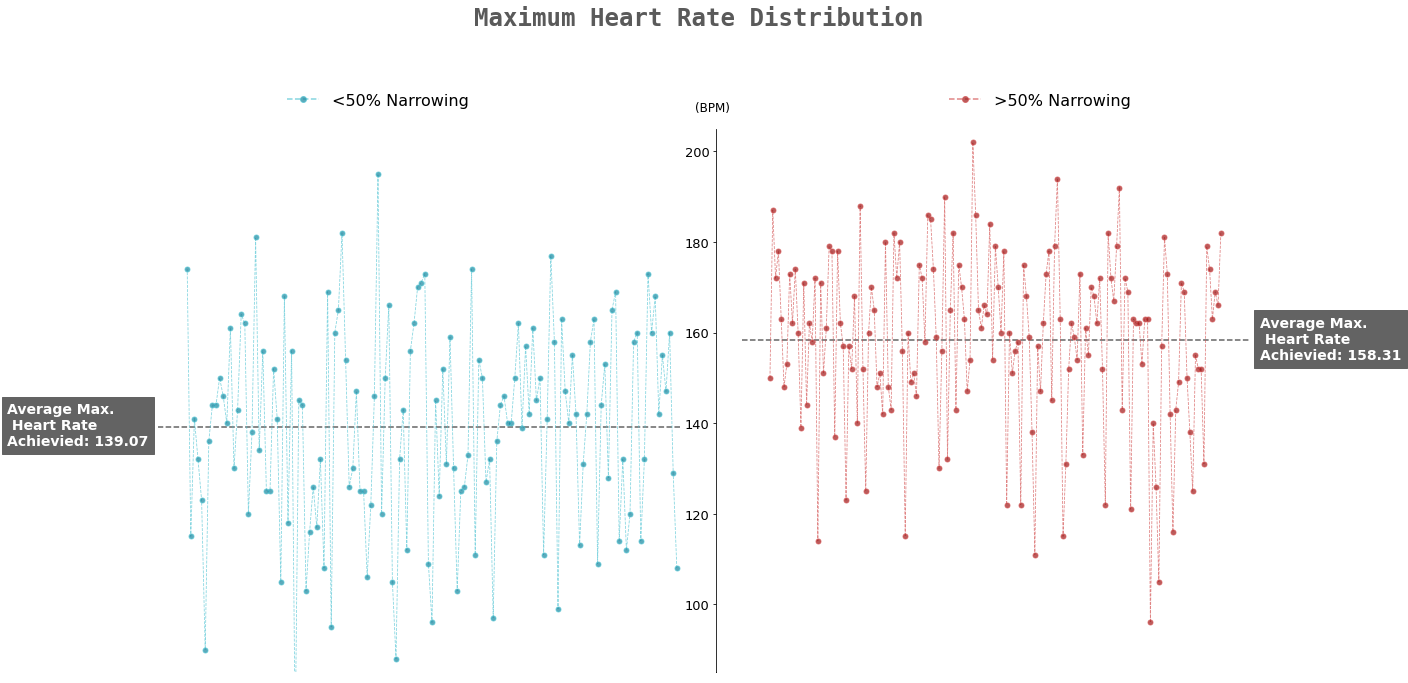

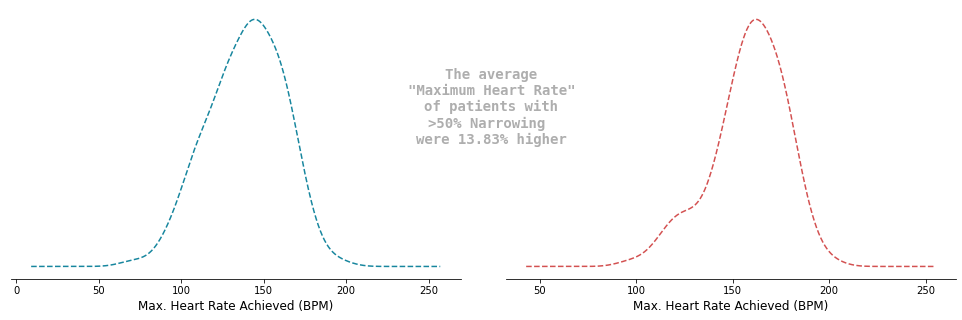

In [17]:
mean_0 = df[df['target']==0]['thalach'].mean()
mean_1 = df[df['target']==1]['thalach'].mean()

custom_lines = [Line2D([0], [0], marker='o', color=colors_blue[3], markerfacecolor=colors_blue[2],ls='--',
                       alpha=0.7),
                Line2D([0], [0], marker='o', color=colors_red[3], markerfacecolor=colors_red[2],ls='--',
                       alpha=0.7)]

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=False)

# Left Line Plot

ax[0].plot(df[df['target']==0]['thalach'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_blue[3],
            markerfacecolor=colors_blue[2],markersize=5)
ax[0].hlines(mean_0,xmin=160,xmax=400,ls='--',color=colors_dark[2])
ax[0].invert_xaxis()
ax[0].spines['top'].set_color(None)
ax[0].spines['left'].set_color(None)
ax[0].set_ylim(85,205)
ax[0].set_xticks([])
ax[0].set_xlim(305,150)
ax[0].yaxis.tick_right()
ax[0].spines['bottom'].set_color(None)
fig.text(s='Average Max.\n Heart Rate \nAchievied: {:.2f}'.format(mean_0),x=0.02,y=0.44,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')


# Right Line Plot

ax[1].plot(df[df['target']==1]['thalach'],marker='o',lw=0.8,ls='--',alpha=0.7,color=colors_red[3],
          markerfacecolor=colors_red[2],markersize=5)
ax[1].hlines(mean_1,xmin=-10,xmax=170,ls='--',color=colors_dark[2])
ax[1].spines['top'].set_color(None)
ax[1].spines['right'].set_color(None)
ax[1].spines['bottom'].set_color(None)
ax[1].set_ylim(85,205)
ax[1].set_xticks([])
ax[1].tick_params(axis='y', which='major', labelsize=13)
fig.text(s='Average Max.\n Heart Rate \nAchievied: {:.2f}'.format(mean_1),x=0.89,y=0.56,color='white',
         backgroundcolor=colors_dark[2],fontsize=14,weight='bold')
fig.text(s='(BPM)',x=0.51,y=0.905,fontdict={'color':'black','size':12,'ha':'center'})


fig2,ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
sns.despine(fig2)

# Left KDE Plot

df[df['target']==0]['thalach'].plot.kde(ls='--',color=colors_blue[2],ax=ax[0])
ax[0].spines['left'].set_color(None)
ax[0].set_ylabel(None)
ax[0].set_yticks([])
ax[0].set_xlabel('Max. Heart Rate Achieved (BPM)',fontsize=12)


# Right KDE Plot

df[df['target']==1]['thalach'].plot.kde(ls='--',color=colors_red[3],ax=ax[1])
ax[1].spines['left'].set_color(None)
ax[1].set_ylabel(None)
ax[1].set_yticks([])
fig2.text(s='The average\n"Maximum Heart Rate"\nof patients with\n>50% Narrowing \nwere {:.2f}% higher'.format((mean_1-mean_0)*100/mean_0),
          x=0.57,y=0.5,
         fontdict={'color':colors_dark[3],'size':14,'fontweight':'semibold','fontname':'monospace','ha':'center'})
ax[1].set_xlabel('Max. Heart Rate Achieved (BPM)',fontsize=12)


fig.suptitle('Maximum Heart Rate Distribution',size=24,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1.05,x=0.5,alpha=0.8)
fig.legend(handles=custom_lines,labels=('<50% Narrowing','>50% Narrowing'),frameon=False,
           ncol=2,bbox_to_anchor=(0.81,0.95),columnspacing=30,fontsize=16)



fig.subplots_adjust(wspace=0)
fig2.subplots_adjust(wspace=0.1,right=1)

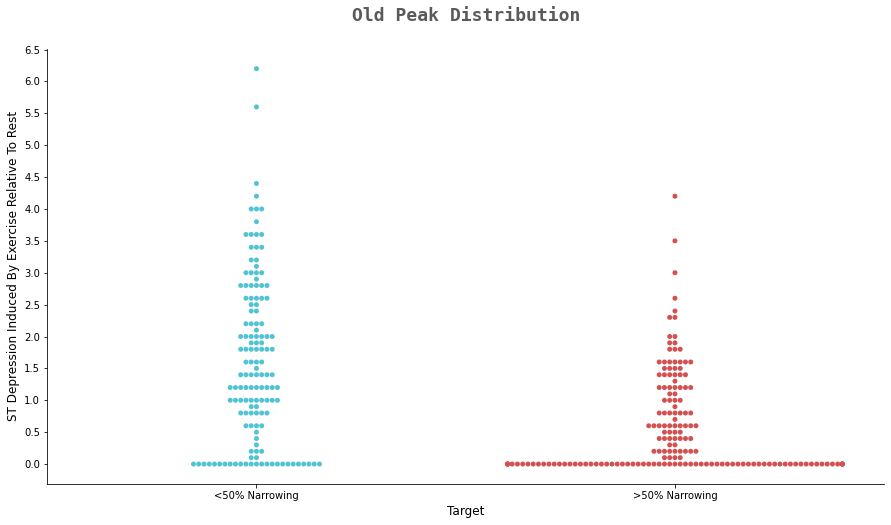

In [18]:
fig,ax = plt.subplots(figsize=(15,8))
sns.swarmplot(data=df,y='oldpeak',x='target',ax=ax,palette=[colors_blue[3],colors_red[3]])
sns.despine(fig)
ax.set_yticks(np.linspace(0,6.5,14))
ax.set_ylabel('ST Depression Induced By Exercise Relative To Rest',fontsize=12)
ax.set_xlabel('Target',fontsize=12)
ax.set_xticklabels(['<50% Narrowing','>50% Narrowing'])
ax.set_title('Old Peak Distribution',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1.05,x=0.5,alpha=0.8)

plt.show()

### Distribution of categorical with respect to the target feature

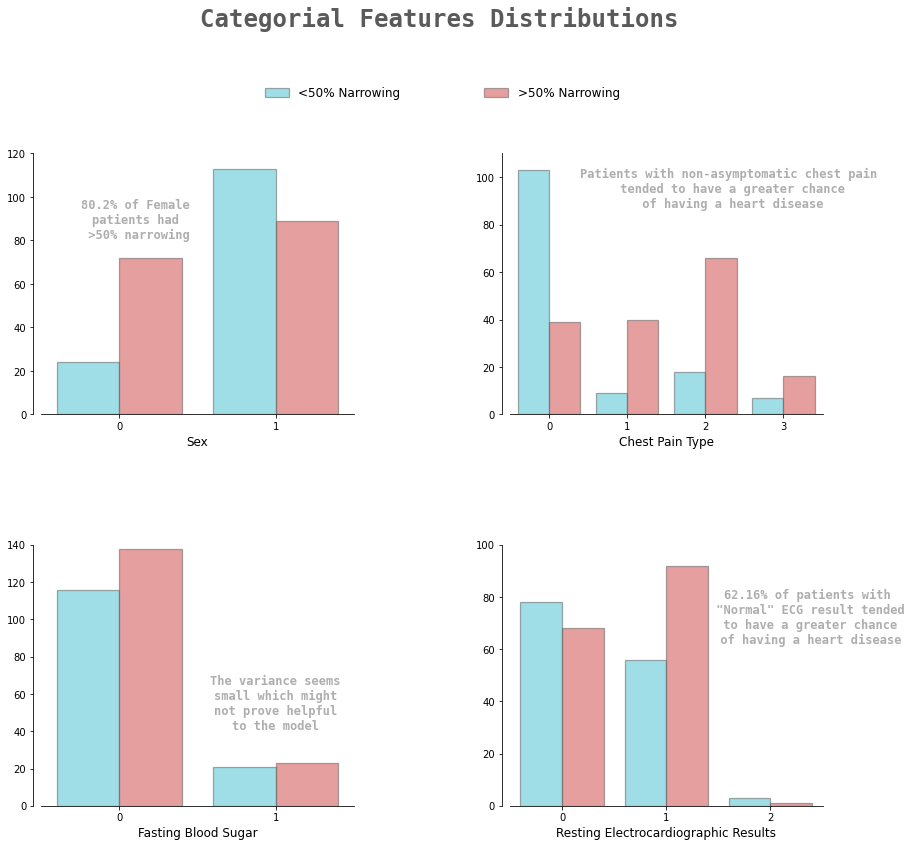

In [19]:
col_mix = [colors_blue[3],colors_red[3]]
fig,ax = plt.subplots(2,2,figsize=(14,12))
sns.despine()

fig.suptitle("Categorial Features Distributions",size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=1.05,x=0.52,alpha=0.8)


sns.countplot(data=df,x='sex',hue='target',ax=ax[0][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
              lw=1.25,saturation=1)
ax[0,0].get_legend().remove()
ax[0,0].set_xlabel('Sex',fontsize=12)
ax[0,0].set_title('80.2% of Female\npatients had\n >50% narrowing',y=0.65,x=0.3,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,0].spines['left'].set_position(('outward', 8))
ax[0,0].set_ylim(0,120)
ax[0,0].set_ylabel(None)


sns.countplot(data=df,x='cp',hue='target',ax=ax[0][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[0,1].get_legend().remove()
ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel('Chest Pain Type',fontsize=12)
ax[0,1].set_title('Patients with non-asymptomatic chest pain\n tended to have a greater chance\n of having a heart disease',
                  y=0.77,x=0.7,
                  fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,1].spines['left'].set_position(('outward', 8))
ax[0,1].set_ylim(0,110)


sns.countplot(data=df,x='fbs',hue='target',ax=ax[1][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,0].get_legend().remove()
ax[1,0].set_xlabel('Fasting Blood Sugar',fontsize=12)

ax[1,0].set_title('The variance seems\nsmall which might\nnot prove helpful\nto the model',y=0.27,x=0.75,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,0].spines['left'].set_position(('outward', 8))
ax[1,0].set_ylim(0,140)
ax[1,0].set_ylabel(None)


sns.countplot(data=df,x='restecg',hue='target',ax=ax[1][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,1].set_ylabel(None)
ax[1,1].get_legend().remove()
ax[1,1].set_xlabel('Resting Electrocardiographic Results',fontsize=12)
ax[1,1].set_title('62.16% of patients with\n "Normal" ECG result tended\n to have a greater chance\n of having a heart disease',
                  y=0.60,x=0.95,fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,1].spines['left'].set_position(('outward', 8))
ax[1,1].set_ylim(0,100)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.legend(['<50% Narrowing','>50% Narrowing'],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.71,0.97))

plt.show()

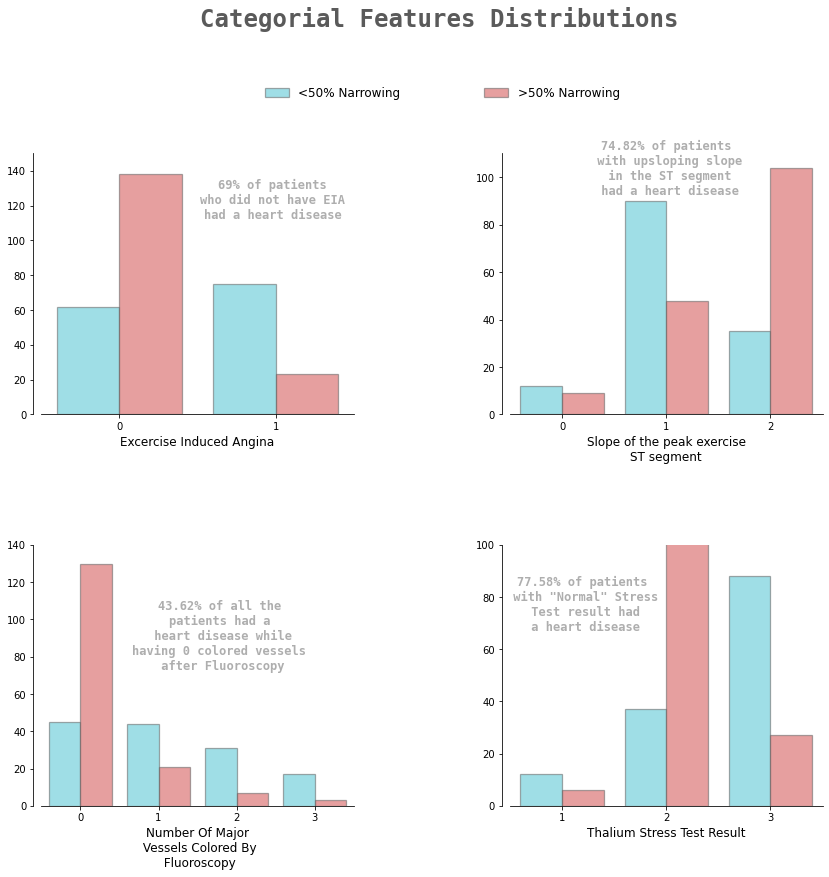

In [20]:
col_mix = [colors_blue[3],colors_red[3]]
fig,ax = plt.subplots(2,2,figsize=(14,12))
sns.despine()

fig.suptitle("Categorial Features Distributions",size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=1.05,x=0.52,alpha=0.8)


sns.countplot(data=df,x='exang',hue='target',ax=ax[0][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
              lw=1.25,saturation=1)
ax[0,0].get_legend().remove()
ax[0,0].set_xlabel('Excercise Induced Angina',fontsize=12)
ax[0,0].set_title('69% of patients\nwho did not have EIA\nhad a heart disease',y=0.73,x=0.74,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,0].spines['left'].set_position(('outward', 8))
ax[0,0].set_ylim(0,150)
ax[0,0].set_ylabel(None)


sns.countplot(data=df,x='slope',hue='target',ax=ax[0][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[0,1].get_legend().remove()
ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel('Slope of the peak exercise\nST segment',fontsize=12)
ax[0,1].set_title('74.82% of patients\n with upsloping slope\n in the ST segment\n had a heart disease',
                  y=0.82,x=0.5,
                  fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[0,1].spines['left'].set_position(('outward', 8))
ax[0,1].set_ylim(0,110)


sns.countplot(data=df,x='ca',hue='target',ax=ax[1][0],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,0].get_legend().remove()
ax[1,0].set_xlabel('Number Of Major\n Vessels Colored By\n Fluoroscopy',fontsize=12)

ax[1,0].set_title('43.62% of all the\npatients had a\n heart disease while\nhaving 0 colored vessels\n after Fluoroscopy',
                  y=0.5,x=0.57,fontdict={'color':colors_dark[3],
                                          'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,0].spines['left'].set_position(('outward', 8))
ax[1,0].set_ylim(0,140)
ax[1,0].set_ylabel(None)


sns.countplot(data=df,x='thal',hue='target',ax=ax[1][1],palette=col_mix,alpha=0.55,edgecolor=colors_dark[2],
             lw=1.25,saturation=1)
ax[1,1].set_ylabel(None)
ax[1,1].get_legend().remove()
ax[1,1].set_xlabel('Thalium Stress Test Result',fontsize=12)
ax[1,1].set_title('77.58% of patients\n with "Normal" Stress\n Test result had\n a heart disease',y=0.65,x=0.23,
                fontdict={'color':colors_dark[3],'size':12,'fontweight':'semibold','fontname':'monospace'})
ax[1,1].spines['left'].set_position(('outward', 8))
ax[1,1].set_ylim(0,100)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.legend(['<50% Narrowing','>50% Narrowing'],frameon=False,ncol=2,
           columnspacing=7,fontsize=12,bbox_to_anchor=(0.71,0.97))

plt.show()

***

# Feature Selection

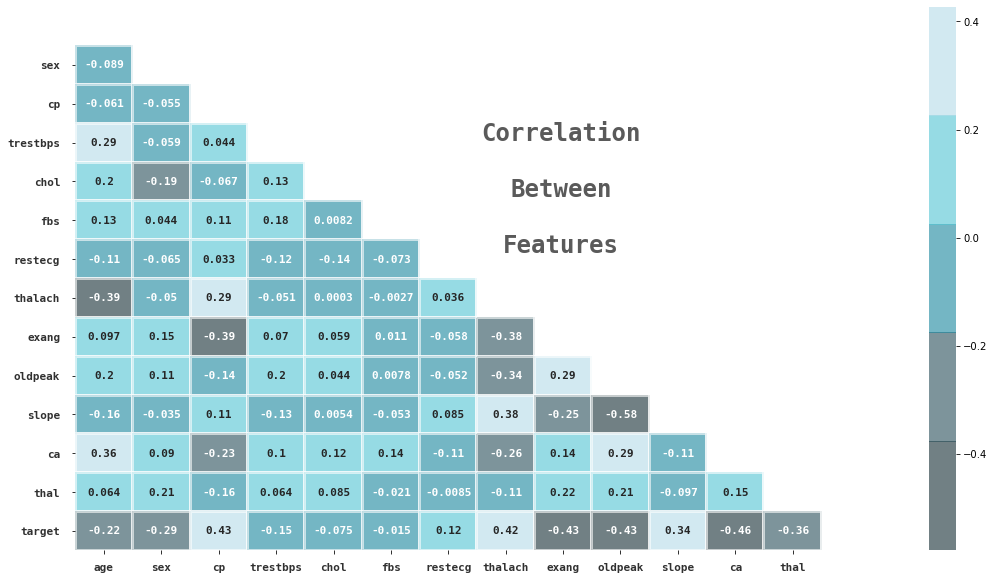

In [21]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cols = list(df.columns)

fig,ax = plt.subplots(figsize=(18,10))
ax = sns.heatmap(corr,annot=True,cmap=colors_blue,alpha=0.6,linewidths=2,
            annot_kws={'weight':'bold','family':'monospace','size':11},mask=mask)
ax.set_xticks(np.linspace(0.5,12.5,13))
ax.set_yticks(np.linspace(1.5,13.5,13))
ax.set_xticklabels(labels=cols[:-1],
                   fontdict={'weight':'semibold','family':'monospace','size':11,
                             'color':colors_dark[1],'y':-0.01})
ax.set_yticklabels(labels=cols[1:],
                   fontdict={'weight':'semibold','family':'monospace','size':11,
                             'color':colors_dark[1],'x':-0.01})
fig.suptitle('Correlation\n\nBetween\n\nFeatures',
             size=24,fontweight='bold',fontname='monospace',
             color=colors_dark[1],y=0.72,x=0.5,alpha=0.8)
plt.show()

Now let's see which features are significant to our target column

## Performing Pearson's Regression Test

In this, we find the correlation coefficient between the features and the target variable.<br> 
After that we find the p-value and check it against alpha (Significance Level) to see if a feature will be significant to our model or not. 

In [22]:
for i in df.columns:
    r,p = stats.pearsonr(df['target'],df[i])
    if p<0.01:
        print(f'{i} is significant')
    else:
        print(f'{i} is not significant')

age is significant
sex is significant
cp is significant
trestbps is not significant
chol is not significant
fbs is not significant
restecg is not significant
thalach is significant
exang is significant
oldpeak is significant
slope is significant
ca is significant
thal is significant
target is significant


## Using mutual_info_classif 

Note: We can only use this if we're facing a classification problem.<br> For regression problems, we can use the mutual_info_regression function from the feature_selection library.

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [24]:
model = mutual_info_classif(X,y)
model_series=pd.Series(model)
model_series.index= X.columns
model_series.sort_values(ascending=False)

thal        0.134186
ca          0.128263
cp          0.109878
oldpeak     0.093809
chol        0.086482
thalach     0.078889
fbs         0.066530
exang       0.063208
slope       0.052489
sex         0.030603
age         0.021284
trestbps    0.000000
restecg     0.000000
dtype: float64

With this, we can use the top 8 features

In [25]:
top_8_cols = SelectKBest(mutual_info_classif,k=8)
top_8_cols.fit(X,y)
X.columns[top_8_cols.get_support()]

Index(['cp', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

## Performing Chi-Square Test

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
294,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
295,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
296,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
chi_df=df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]

In [28]:
X_chi=chi_df.drop('target',axis=1)
y_chi=chi_df['target']

In [29]:
f,p=chi2(X_chi,y_chi)

The smaller the p-value, the better a particular feature is in this test.
Also, The bigger the f-value, the better a feature is,

In [30]:
chi_p = pd.Series(p)
chi_p.index = X_chi.columns
chi_p.sort_values()

ca         6.135912e-20
cp         7.883003e-15
exang      1.280817e-09
slope      2.111132e-03
sex        4.475951e-03
thal       1.667440e-02
restecg    1.184728e-01
fbs        8.153976e-01
dtype: float64

So after all the tests and some trial and error, I decided to choose the following features for my model.

In [31]:
X = df[['thal','exang','cp','ca','sex','oldpeak','slope']]
y=df['target']

***

# Modelling

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=np.random.randint(1,1000,1)[0])

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [34]:
X_train = pd.DataFrame(scaled_train,columns=X.columns,index=X_train.index)

In [35]:
X_test = pd.DataFrame(scaled_test,columns=X.columns,index=X_test.index)

## Spot Checking

**Spot Checking** is a fast and easy way to see which algorithms will work the best with the features.
It gives you a good starting point as to which algorithms you should focus on depending upon their results.

In [36]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [37]:
finalResults[:10]

[('LR', 0.8715778994524639),
 ('Ridge', 0.8715778994524639),
 ('NuSVC', 0.8715778994524639),
 ('PAC', 0.8586309523809523),
 ('BNB', 0.8556547619047619),
 ('XGB', 0.8536953242835597),
 ('SVC', 0.8461157842652152),
 ('RF', 0.8451417004048583),
 ('GNB', 0.8444444444444444),
 ('ADA', 0.8400000000000001)]

***

# Final Model

After alot of trial and error, I found out 6 algorithms which worked the best with my chosen features.
They were:
1. Logistic Regression
2. SVC
3. Random Forest
4. PassiveAgressiveClassifer
5. SGDC
6. KNN

## Hyperparameter Tuning

In [38]:
model_params = {
    'Logistic Regression':
    {
        'model':LogisticRegression(max_iter=1000),
        'params':
        {
            'C':np.logspace(-3,2,30),
            'class_weight':['balanced',None]
        }
    },
    'SVM':
    {
        'model':SVC(),
        'params':
        {
            'C':np.logspace(-3,2,30),
            'gamma':np.logspace(-3,2,30)
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    },
    'K-Nearest Neighbors':
    {
        'model':KNeighborsClassifier(),
        'params':
        {
            'n_neighbors':list(range(1,41)),
            'weights':['uniform','distance']
        }
    },
    'Passive Aggressive Classifier':
    {
        'model':PassiveAggressiveClassifier(),
        'params':
        {
            'C':np.logspace(-3,1,30),
            'loss':['hinge','squared_hinge']
        }
    },
    'SGD':
    {
        'model':SGDClassifier(),
        'params':
        {
            'alpha':np.logspace(-3,1,30),
            'penalty':['l1','l2','elasticnet'],
            'l1_ratio':[0.05,0.1,0.15,0.20,0.25,0.35,0.5,0.6,0.7,0.8,0.9],
        }
    }
}

In [39]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = GridSearchCV(params['model'],params['params'],cv=cv)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,Logistic Regression,"{'C': 0.11721022975334805, 'class_weight': 'ba...",0.854040
1,SVM,"{'C': 1.8873918221350976, 'gamma': 0.117210229...",0.854209
2,Random Forest,"{'max_depth': 4, 'max_features': 'auto', 'n_es...",0.848870
3,K-Nearest Neighbors,"{'n_neighbors': 14, 'weights': 'uniform'}",0.847288
4,Passive Aggressive Classifier,"{'C': 0.017433288221999882, 'loss': 'hinge'}",0.845565
5,SGD,"{'alpha': 0.017433288221999882, 'l1_ratio': 0....",0.855706


Here are the best parameters for all of my chosen models

***

# Ensembling The Models

Ensembling your best models tend to give better overall results and it is a good practice whenever you want to solve a problem.

In [40]:
param=data['Parameters']
model = VotingClassifier(estimators=[('LR',LogisticRegression(**param[0])),
                                           ('SVC', SVC(**param[1])),
                                           ('RF',RandomForestClassifier(**param[2])),
                                           ('KNN',KNeighborsClassifier(**param[3])),
                                           ('PAC',PassiveAggressiveClassifier(**param[4])),
                                           ('SGD',SGDClassifier(**param[5]))
                                          ],voting='hard')

accuracy=[]

skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)
    

In [41]:
np.mean(accuracy)

0.8522033898305084

# Conclusion

The model turned out to be ~85% accurate with the ensemble technique.<br>
With this, I'll conclude the EDA and Modelling of the Heart Disease Dataset!

***

# <center>Thank You!